
# Definindo o problema


Vamos considerar o cenário "clássico" do jogo de par ou ímpar, onde cada jogador usa somente uma mão e pode colocar qualquer quantidade de dedos. Assim, matematicamente o cenário é equivalente ao seguinte problema:

*Dados dois números inteiros entre 0 e 5 selecionados aleatoriamente de maneira uniforme, qual a probabilidade de o resultado da soma desses dois números ser ímpar?*



# Resolução

Pela definição de probabilidade, devemos considerar todos os eventos possíveis e calcular a razão entre os eventos favoráveis (soma ímpar) e o total de eventos. Por evento, estamos considerando a escolha de um número por cada jogador, por exemplo, $(0, 1)$. A cada evento, consideraremos uma variável chamada 'favoravel' para designar se o resultado do jogo correspondente a um dado evento é par (0) ou ímpar (1).

In [1]:
import pandas as pd

In [2]:
eventos = [(mao_A, mao_B) for mao_A in range(6) for mao_B in range(6)]
tabela_par_ou_impar = pd.DataFrame({'evento': eventos})
tabela_par_ou_impar['favoravel'] = tabela_par_ou_impar['evento'].apply(
    lambda evento: sum(evento) % 2
)
tabela_par_ou_impar

,evento,favoravel
0,"(0, 0)",0
1,"(0, 1)",1
2,"(0, 2)",0
3,"(0, 3)",1
4,"(0, 4)",0
5,"(0, 5)",1
6,"(1, 0)",1
7,"(1, 1)",0
8,"(1, 2)",1
9,"(1, 3)",0


Com a tabela de todos os eventos à disposição, podemos calcular a probabilidade do resultado ser ímpar como a média do atributo 'favorável'. Assim, temos:

In [3]:
print(f'Prob(resultado ímpar): {tabela_par_ou_impar.favoravel.mean()}')

Prob(resultado ímpar): 0.5


Assim, concluímos que no modelo de jogo descrito inicialmente **ambas as escolhas têm chances iguais**.

# Analisando raciocínios inconsistentes

Agora, vamos considerar dois tipos de argumentos comumente usados neste contexto que apontam para uma probabilidade maior da escolha 'par' e mostrar porque eles são inconsistentes quando levamos em conta a definição de probabilidade, embora pareçam razoáveis à primeira vista.

## 1. "Cada jogador escolhe um número, que pode ser par ou ímpar. Como par + par = par, ímpar + ímpar = par e par + ímpar = ímpar, há mais possibilidades onde o resultado final é par."

O erro de raciocínio lógico aqui consiste numa confusão da definição de probabilidade como usada na seção anterior. A ideia de que nós contamos a **proporção dos eventos favoráveis em relação aos eventos totais** para determinar a probabilidade de um determinado resultado **só é válida quando os eventos são igualmente prováveis**. 

Um exemplo que pode facilitar o entendimento desse conceito é considerar o lançamento de um dado e dizer que a probabilidade de o resultado de uma face qualquer, digamos 6, ser 1/6. Isto acontece porque assumimos que cada face é igualmente provável. Agora, se soubéssemos que o dado cai uma outra face, digamos 5, com uma probabilidade de 25%, assumindo que as demais chances são iguais nos daria uma probabilidade de obter 6 de 3/20, que é diferente da anterior.

Voltando ao problema do par ou ímpar, a falácia aqui consiste em, após agrupar os eventos nos tipos 0 (ambos jogadores escolhem um número par), 1 (um jogador escolhe um número par e o outro um número ímpar) e 2 (ambos jogadores escolhem um número ímpar), assumir que cada grupo possui a mesma probabilidade de ocorrer. Se isso fosse verdade, de fato 'par' teria mais chances. Entretanto, podemos observar a distribuição desses grupos como segue:

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', rc={'figure.figsize':(12,6)})

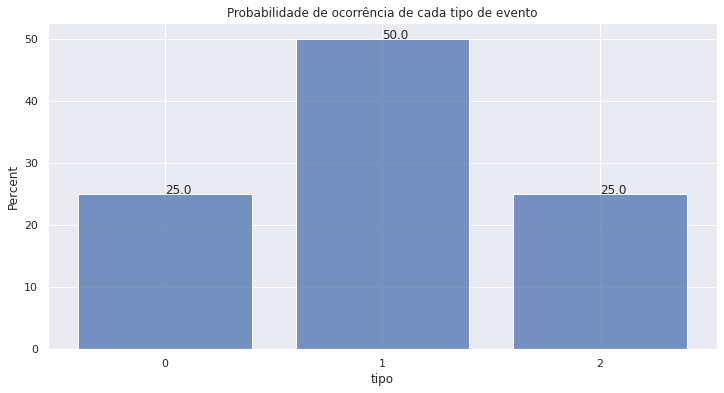

In [5]:
tabela_par_ou_impar['tipo'] = tabela_par_ou_impar['evento'].apply(
    lambda evento: sum(map(lambda mao: mao % 2, evento))
)
ax = sns.histplot(
    data=tabela_par_ou_impar, x='tipo', 
    discrete=True, stat='percent', shrink=0.8
)
for rectangle in ax.patches:
    prob = rectangle.get_height()
    x = rectangle.get_x() + rectangle.get_width() / 2
    y = rectangle.get_height()
    ax.annotate(prob, (x, y))
ax.set_xticks([0, 1, 2])
plt.title('Probabilidade de ocorrência de cada tipo de evento')
plt.show()

Assim, podemos ver claramente que, embora haja dois tipos de evetos que favorecem 'par' e apenas um que favorece 'impar', o evento que favorece 'impar' tem o dobro da probabilidade de ocorrência em relação aos outros dois, de tal modo que as probabilidades do resultado final ser par ou ímpar são iguals:

Prob(impar) = Prob(tipo 1) = 50\%

Prob(par) = Prob(tipo 0) + Prob(tipo 2) = 25\% + 25\% = 50\%

# Perspectivas

As análises apresentadas aqui assumem que, mesmo após escolher uma das opções, digamos par, o jogador seleciona tanto os números pares quanto ímpares com a mesma probabilidade. 

O leitor interessado poderia investigar, usando a metodologia apresentada aqui, o caso em que os jogadores apresentam o viés de escolher números pares ou ímpares com maior probabilidade de acordo com a escolha que fazem. 

Entretanto, é possível perceber com o que foi feito aqui que qualquer **assimetria na distribuição** dos números desta forma - isto é, quem pede par joga par com maior frequência e idem para quem pede ímpar - levará, na verdade, a uma **maior probabilidade para a escolha ímpar!**. Isto porque, recaptulando os tipos de eventos da análise do raciocínio inconsistente 1, neste caso os eventos do tipo 1, que correspondem aos resultados ímpares, teriam uma probabilidade maior do que 50\%.